In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('table.csv')

In [3]:
data

,planet_host,planet_letter,discovery_method,sma,sma_err1,sma_err2,ecc,ecc_err1,ecc_err2,host_gmag,host_gmag_err,companion_mag,companion_mag_err,companion_sep,rho,rho_err
0,HD142,b,Radial Velocity,1.02000,0.03000,-0.03000,0.170,0.060,-0.060,5.565,NaN,8.195,0.202,102.0,3.89463,0.00017
1,HD142,c,Radial Velocity,6.80000,0.50000,-0.50000,0.210,0.070,-0.070,5.565,NaN,8.195,0.202,102.0,3.89463,0.00017
2,WASP26,b,Transit,NaN,NaN,NaN,0.000,NaN,NaN,10.994,NaN,6.669,0.302,3916.0,15.38629,0.00006
3,WASP1,b,Transit,0.03889,0.00053,-0.00073,0.000,NaN,NaN,11.535,NaN,9.671,0.492,1820.0,4.57992,0.00020
4,WASP45,b,Transit,0.03963,0.00114,-0.00112,NaN,NaN,NaN,12.049,NaN,12.111,0.168,929.0,4.37224,0.00024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,HATP1,b,Transit,0.05561,0.00082,-0.00083,NaN,NaN,NaN,10.179,NaN,3.066,0.174,1800.0,11.26789,0.00003
204,HD220842,b,Radial Velocity,0.74000,0.01800,-0.01800,0.404,0.009,-0.009,7.834,NaN,12.355,0.324,340.0,5.25187,0.00023
205,HIP116454,b,Transit,NaN,NaN,NaN,0.200,0.070,-0.070,9.932,NaN,12.911,0.193,524.0,NaN,NaN
206,WASP8,b,Transit,NaN,NaN,NaN,0.310,0.000,0.000,9.612,NaN,8.621,0.871,407.0,4.51060,0.00004


In [4]:
dmag_list = []
sep_list = []
rho_list = []
for index, row in data.iterrows():
    mag1 = row['host_gmag']
    mag2 = row['companion_mag']
    sep = row['companion_sep']
    rho = row['rho']
    dmag_list.append(mag2-mag1)
    sep_list.append(sep)
    rho_list.append(rho)

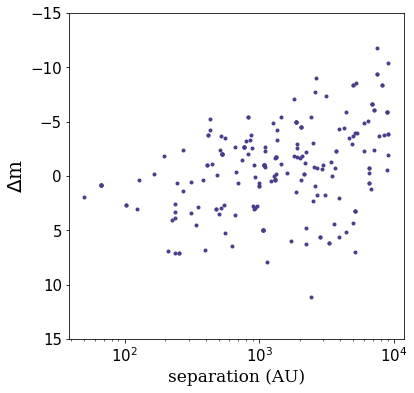

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(sep_list, dmag_list, '.',color='darkslateblue')
ax.set_xlabel('separation (AU)',fontsize=17, family='serif')
ax.set_ylabel('$\Delta$m',fontsize=20, family='serif')
ax.set_ylim(15,-15)
ax.set_xscale('log')
ax.tick_params(axis='both', labelsize=15)

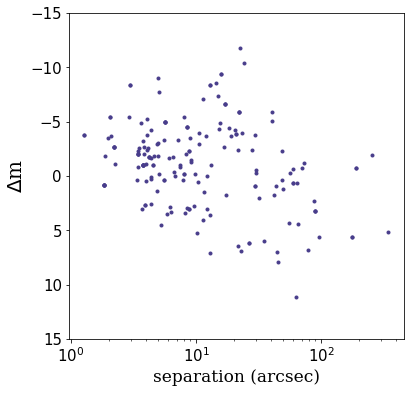

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(rho_list, dmag_list, '.',color='darkslateblue')
ax.set_xlabel('separation (arcsec)',fontsize=17, family='serif')
ax.set_ylabel('$\Delta$m',fontsize=20, family='serif')
ax.set_ylim(15,-15)
ax.set_xscale('log')
ax.tick_params(axis='both', labelsize=15)

In [79]:
e = []
a = []
for index, row in data.iterrows():
    e_val = row['ecc']
    a_val = row['sma']
    # require e,a value
    if math.isnan(e_val)==False and math.isnan(a_val)==False:
        # require radial velocity discovery
        if row['discovery_method']=="Radial Velocity":
            # require e error<0.2
            sigma_e1 = row['ecc_err1']
            sigma_e2 = row['ecc_err2']
            if (sigma_e1<0.2) and (sigma_e2<0.2):
                e.append(e_val)
                a.append(a_val)

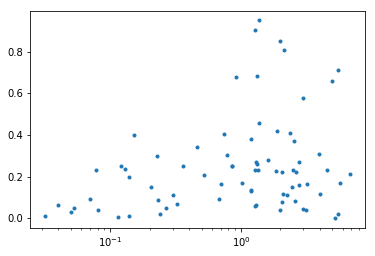

In [80]:
plt.plot(a,e,'.');plt.xscale('log')